### Parte 6: Métricas de rendimiento

El objetivo de este fichero es mostrar las curvas de rendimiento obtenidas por el modelo entrenado para cada una de las propuestas planteadas. Primero se visualizarán todas las curvas en una misma figura para comparar sus valores y su regularidad y luego se mostrarán curvas por separado para tener una mejor comprensión del comportamiento de éstas a lo largo de todas las épocas.

##### 6.1. Métricas obtenidas:

| Propuesta | Variables | 
| -------   | -------   | 
| A         | u10, v10, pblh,th2,t2, psfc,hgt (HR), xland (HR), u10 (va-HR), v10 (va-HR) | 
| B         | Propuesta A + slope (HR), aspect (HR) | 
| C         | Propuesta B + EmaxU, EmaxV, EminU, EminV |

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import pickle 

%matplotlib inline

with open('historiales/historial_UNET_190824_16_80_640.75_PROP_A.pkl', 'rb') as file:
    history_1 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_640.75_PROP_B.pkl', 'rb') as file:
    history_2 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_640.75_PROP_C.pkl', 'rb') as file:
    history_3 = pickle.load(file)

historiales=[history_1, history_2, history_3]
metricas=["loss", "val_loss", "mse", "val_mse", "mae", "val_mae","mape", "val_mape"]
resumen=pd.DataFrame()

for i in range(8): # #{metricas}
    valores=[]

    valores.append(historiales[0][metricas[i]][-1])
    valores.append(historiales[1][metricas[i]][-1])
    valores.append(historiales[2][metricas[i]][-1])

    resumen[metricas[i]]= valores

resumen= pd.concat( [resumen, pd.DataFrame([resumen.mean()])], ignore_index=True) #add promedio
resumen= pd.concat( [resumen, pd.DataFrame([resumen.std()])], ignore_index=True) #add std
resumen= resumen.rename(index={0:"1", 1:"2", 2: "3", 3: "mean", 4:"std"}) #nuevos indices
resumen

,loss,val_loss,mse,val_mse,mae,val_mae,mape,val_mape
1,0.015340,0.018000,0.000244,0.000866,0.010518,0.012447,2.490145,2.440842
2,0.014989,0.017717,0.000228,0.000424,0.010195,0.012348,2.428764,2.430304
3,0.007612,0.011628,0.000080,0.001772,0.004742,0.007597,1.159948,1.458027
mean,0.012647,0.015782,0.000184,0.001021,0.008485,0.010797,2.026286,2.109724
std,0.003563,0.002939,0.000074,0.000561,0.002650,0.002264,0.613105,0.460840


#### 6.2 Curvas para las diferentes propuestas

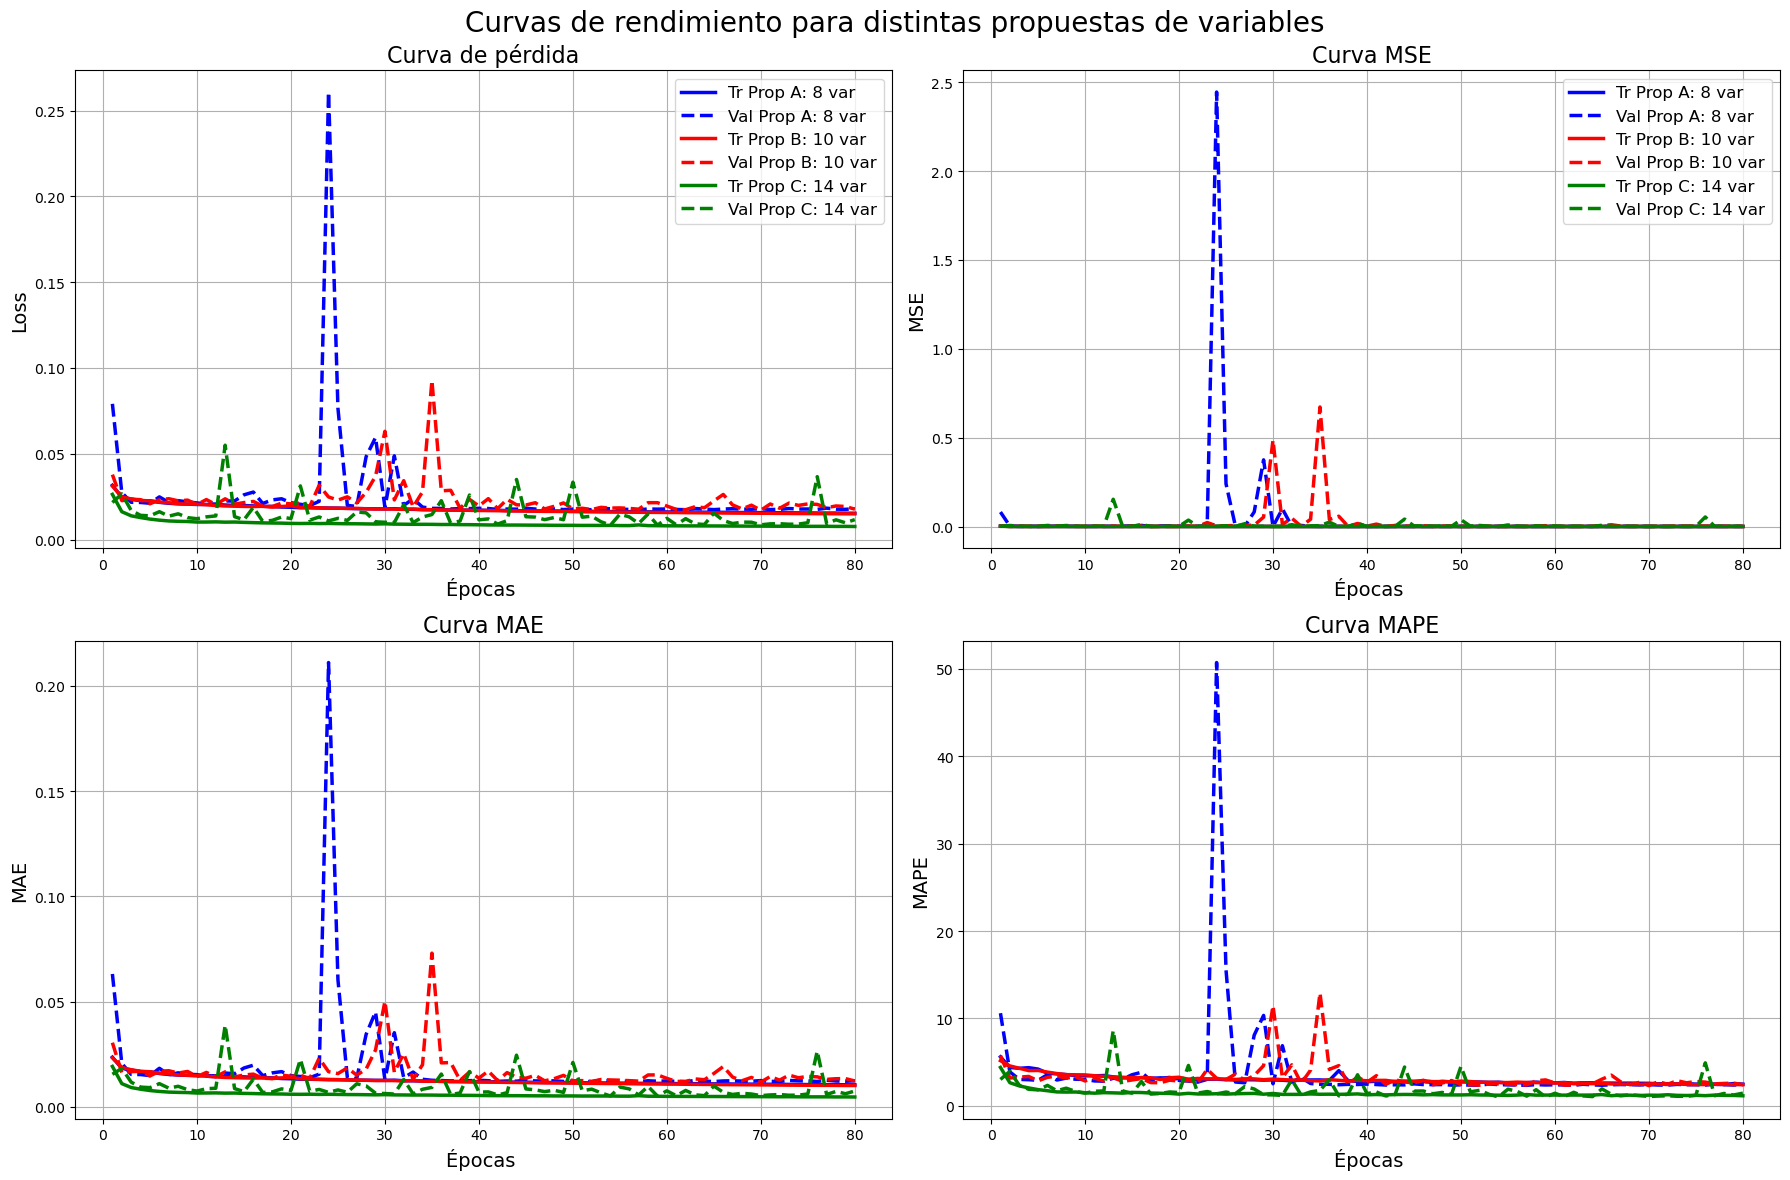

In [2]:
from funciones import plots_metricas

colores=["blue", "red", "green", "yellow"] 
leyenda= ['Tr Prop A: 8 var', 'Val Prop A: 8 var', 
          'Tr Prop B: 10 var', 'Val Prop B: 10 var', 
          'Tr Prop C: 14 var','Val Prop C: 14 var']

plots_metricas(historiales, leyenda, title="Curvas de rendimiento para distintas propuestas de variables")

#### 6.3 Visualización individual

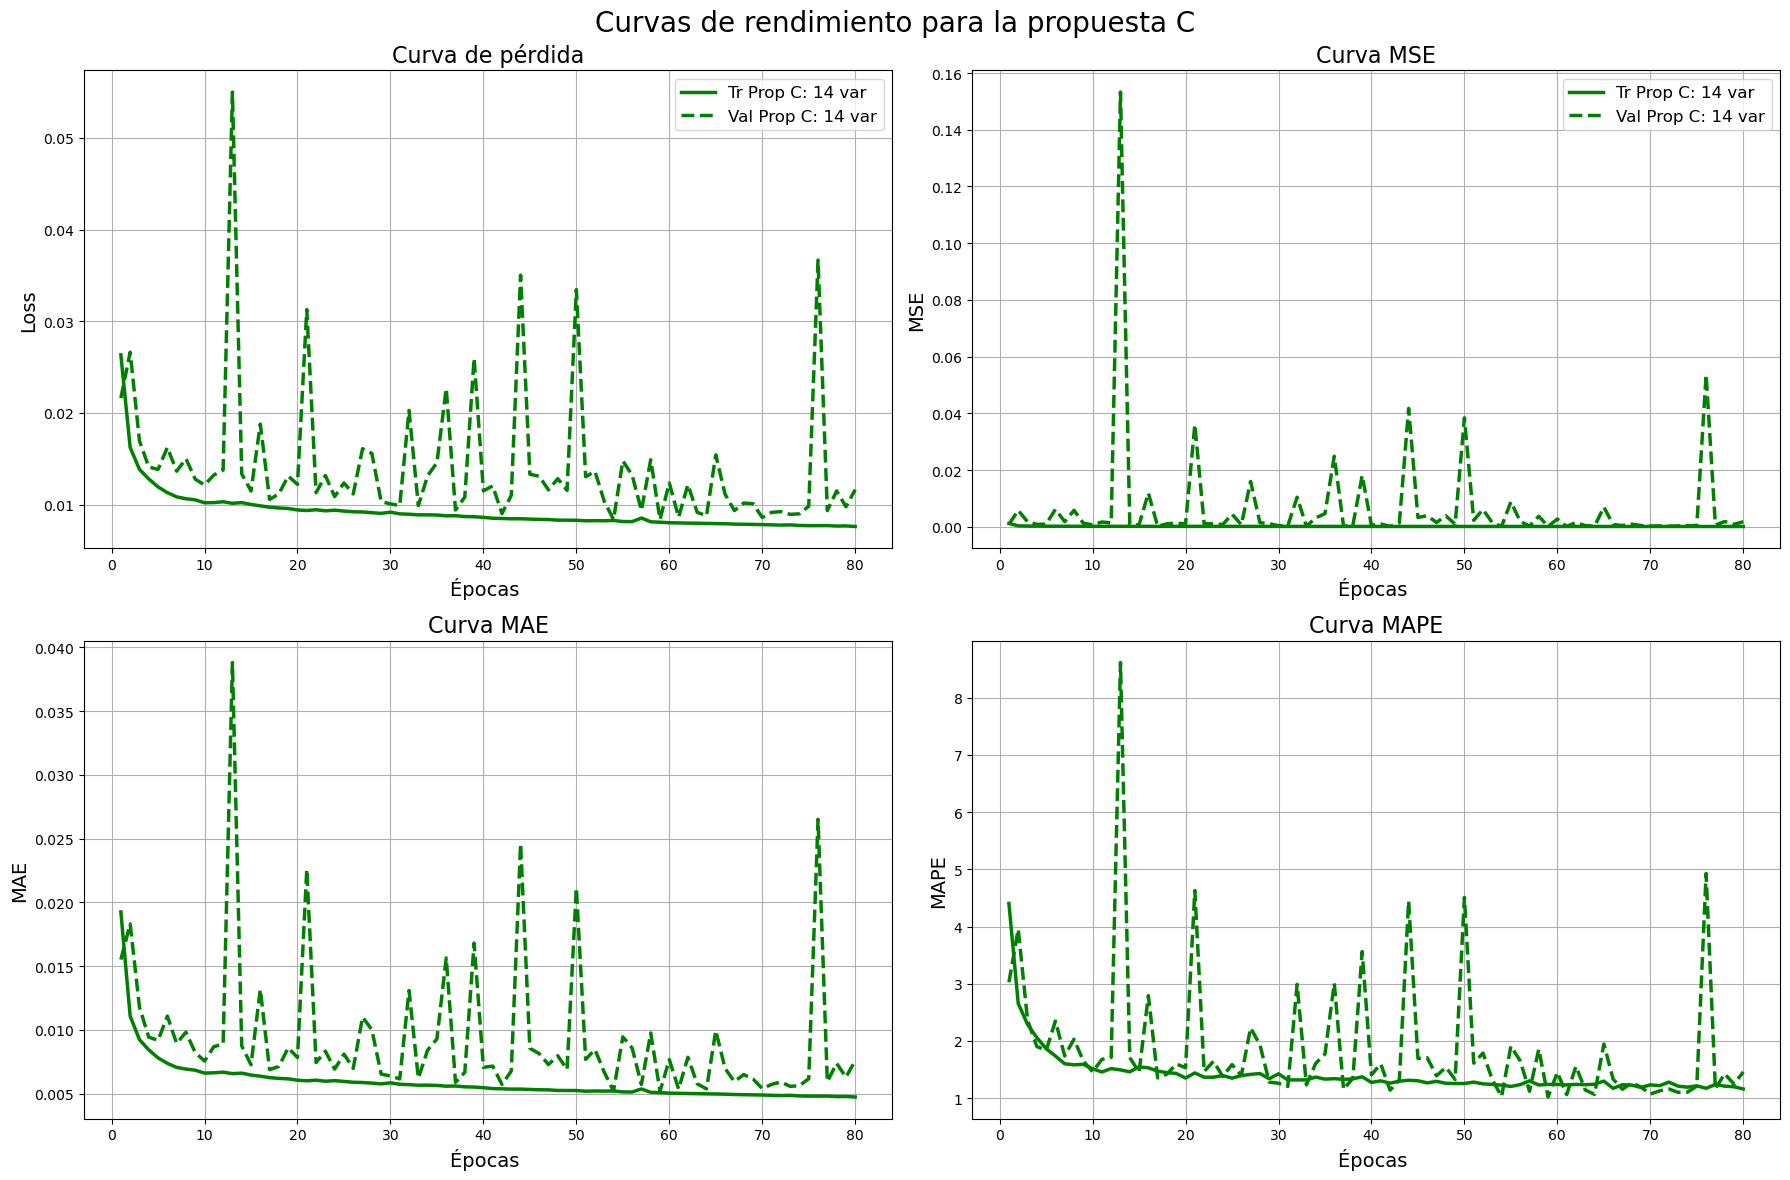

In [6]:
k = 2
plots_metricas([historiales[k]], [leyenda[2*k], leyenda[2*k+1]], title="Curvas de rendimiento para la propuesta C", colores=[colores[k]])

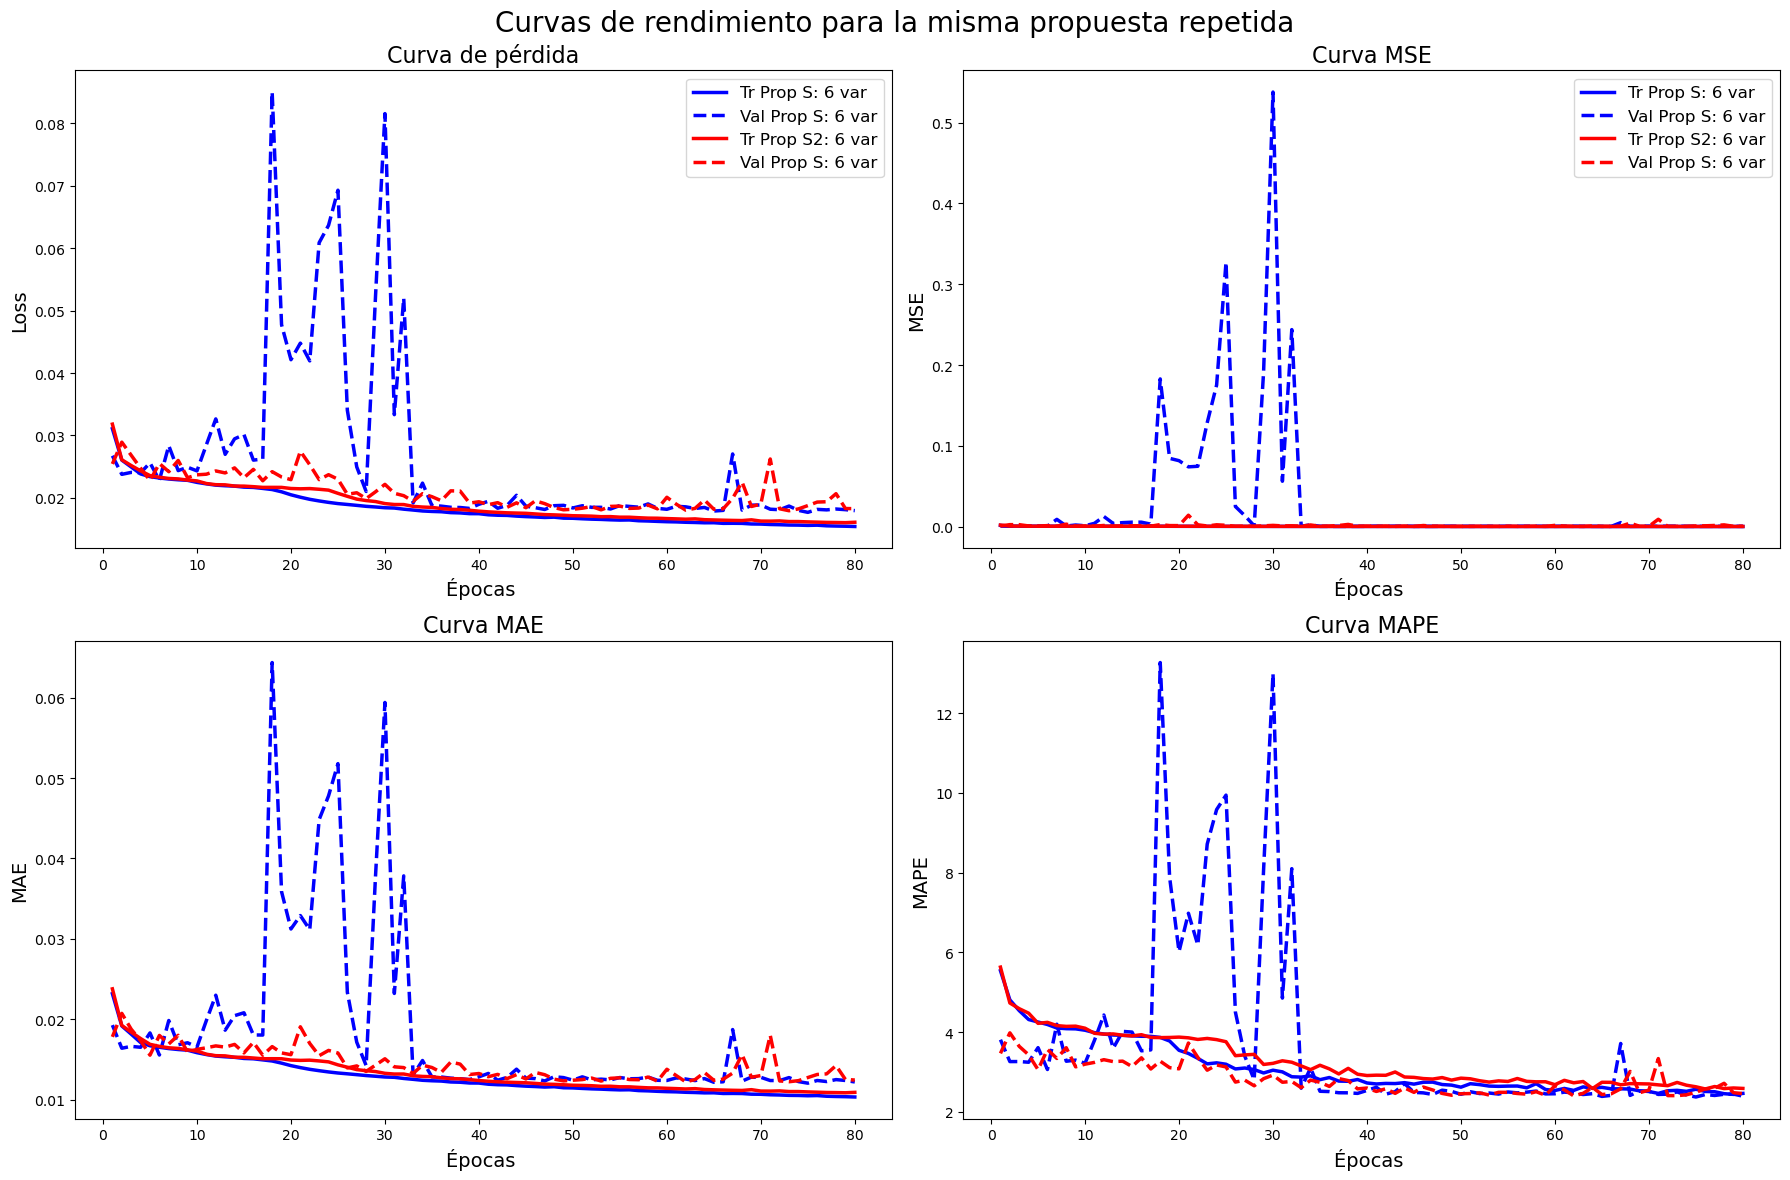

In [11]:
with open('historiales/historial_UNET_190824_16_80_640.75_prop_simple.pkl', 'rb') as file:
    history_1 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_640.75_prop_S_2.pkl', 'rb') as file:
    history_2 = pickle.load(file)

historiales=[history_1, history_2]
leyenda= ['Tr Prop S: 6 var', 'Val Prop S: 6 var', 
          'Tr Prop S2: 6 var', 'Val Prop S: 6 var']

plots_metricas(historiales, leyenda, title="Curvas de rendimiento para la misma propuesta repetida")

#### 6.4 Algunos gráficos complementarios

Debido a la irregularidad en las curvas de entrenamiento de las pruebas realizadas, se decidió explorar algunos hiperparámetros de la red con el fin de evaluar su efecto en la convergencia del entrenamiento. De momento, el primer parámetro a evaluar es el ```batch size``` o tamaño de lote. Para efectos de las siguientes pruebas a mostrar, se cambió la operación de expansión dentro de la arquitectura de la red a la Convolución Traspuesta y así a su vez evidenciar su posible impacto.

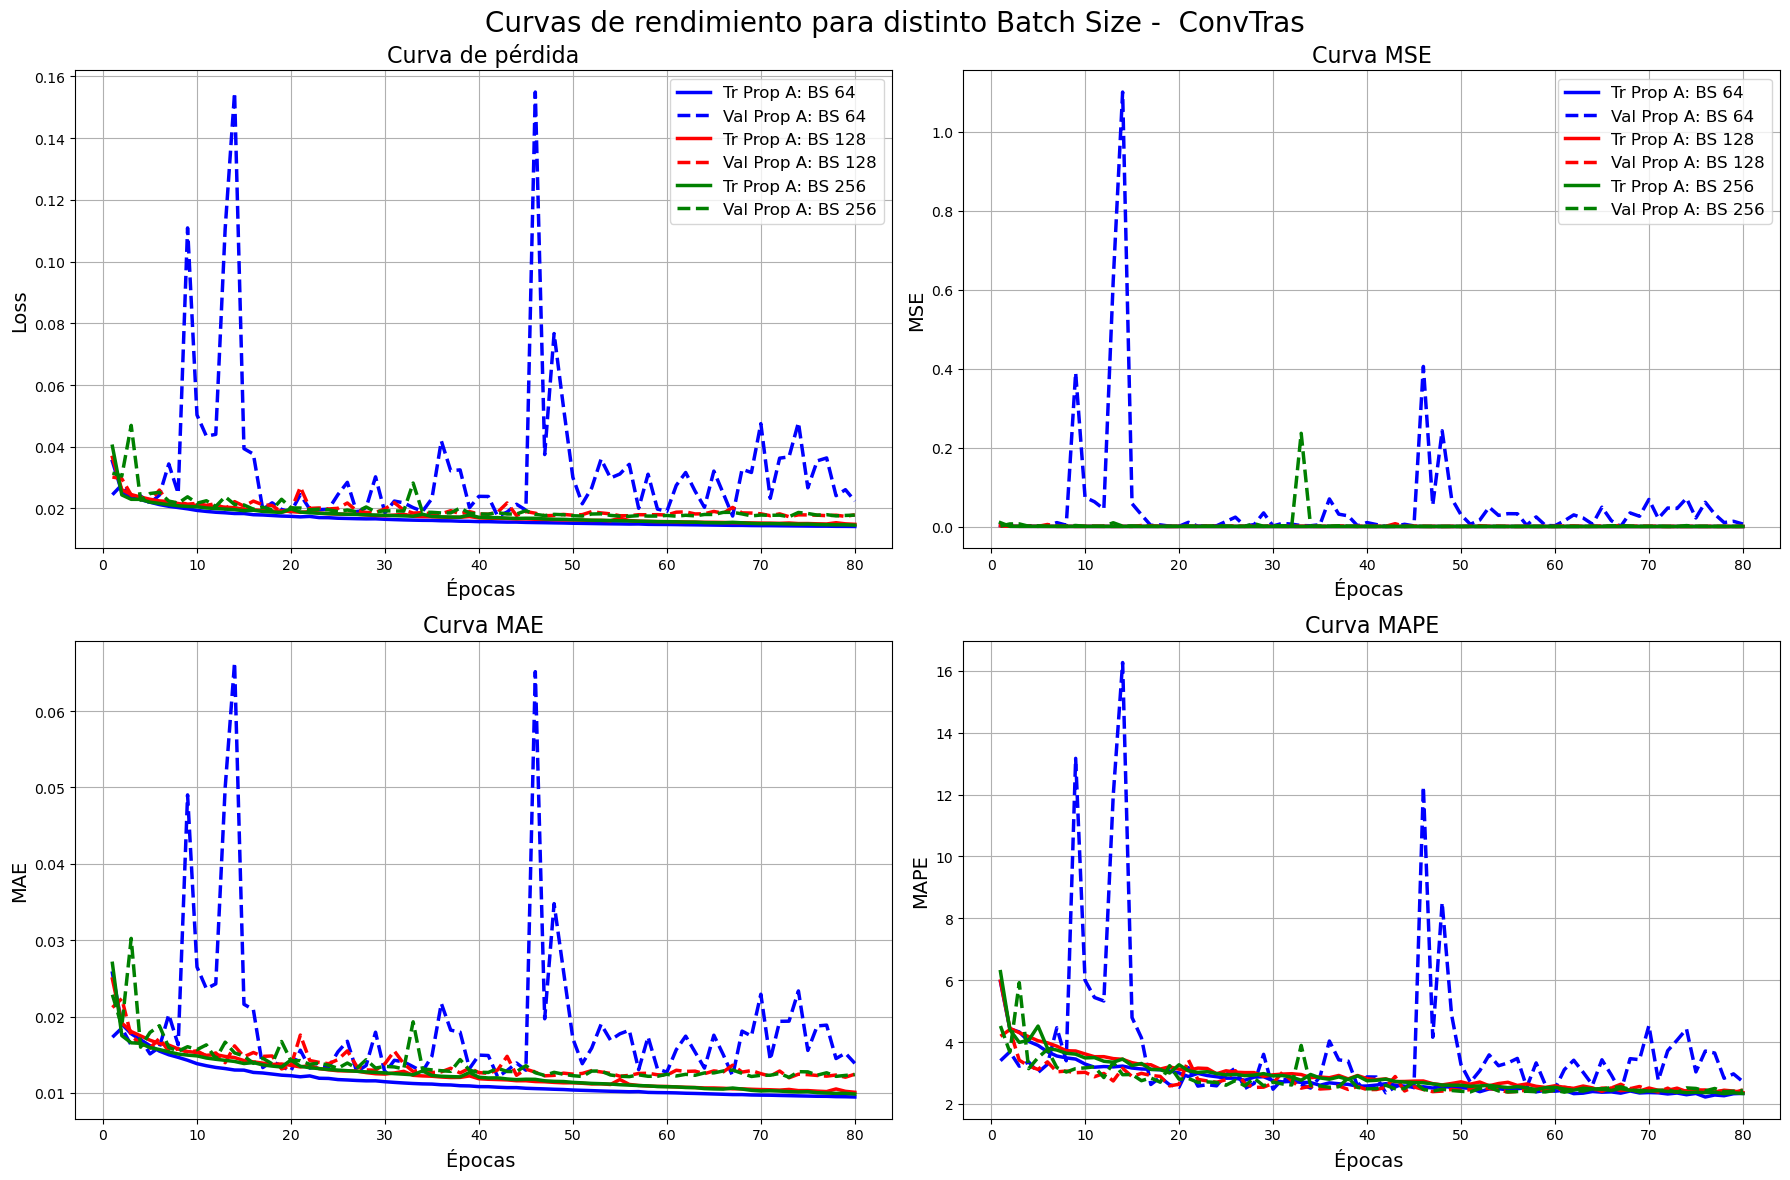

In [14]:
with open('historiales/historial_UNET_190824_16_80_640.75_prop_A_full.pkl', 'rb') as file:
    history_1 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_1280.75_prop_A_full.pkl', 'rb') as file:
    history_2 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_2560.75_prop_A_full.pkl', 'rb') as file:
    history_3 = pickle.load(file)

historiales=[ history_1,history_2, history_3]
leyenda= ['Tr Prop A: BS 64', 'Val Prop A: BS 64', 
          'Tr Prop A: BS 128', 'Val Prop A: BS 128',
          'Tr Prop A: BS 256','Val Prop A: BS 256',]

colores=["blue", "red", "green"]

plots_metricas(historiales, leyenda, title="Curvas de rendimiento para distinto Batch Size -  ConvTras", colores=colores)

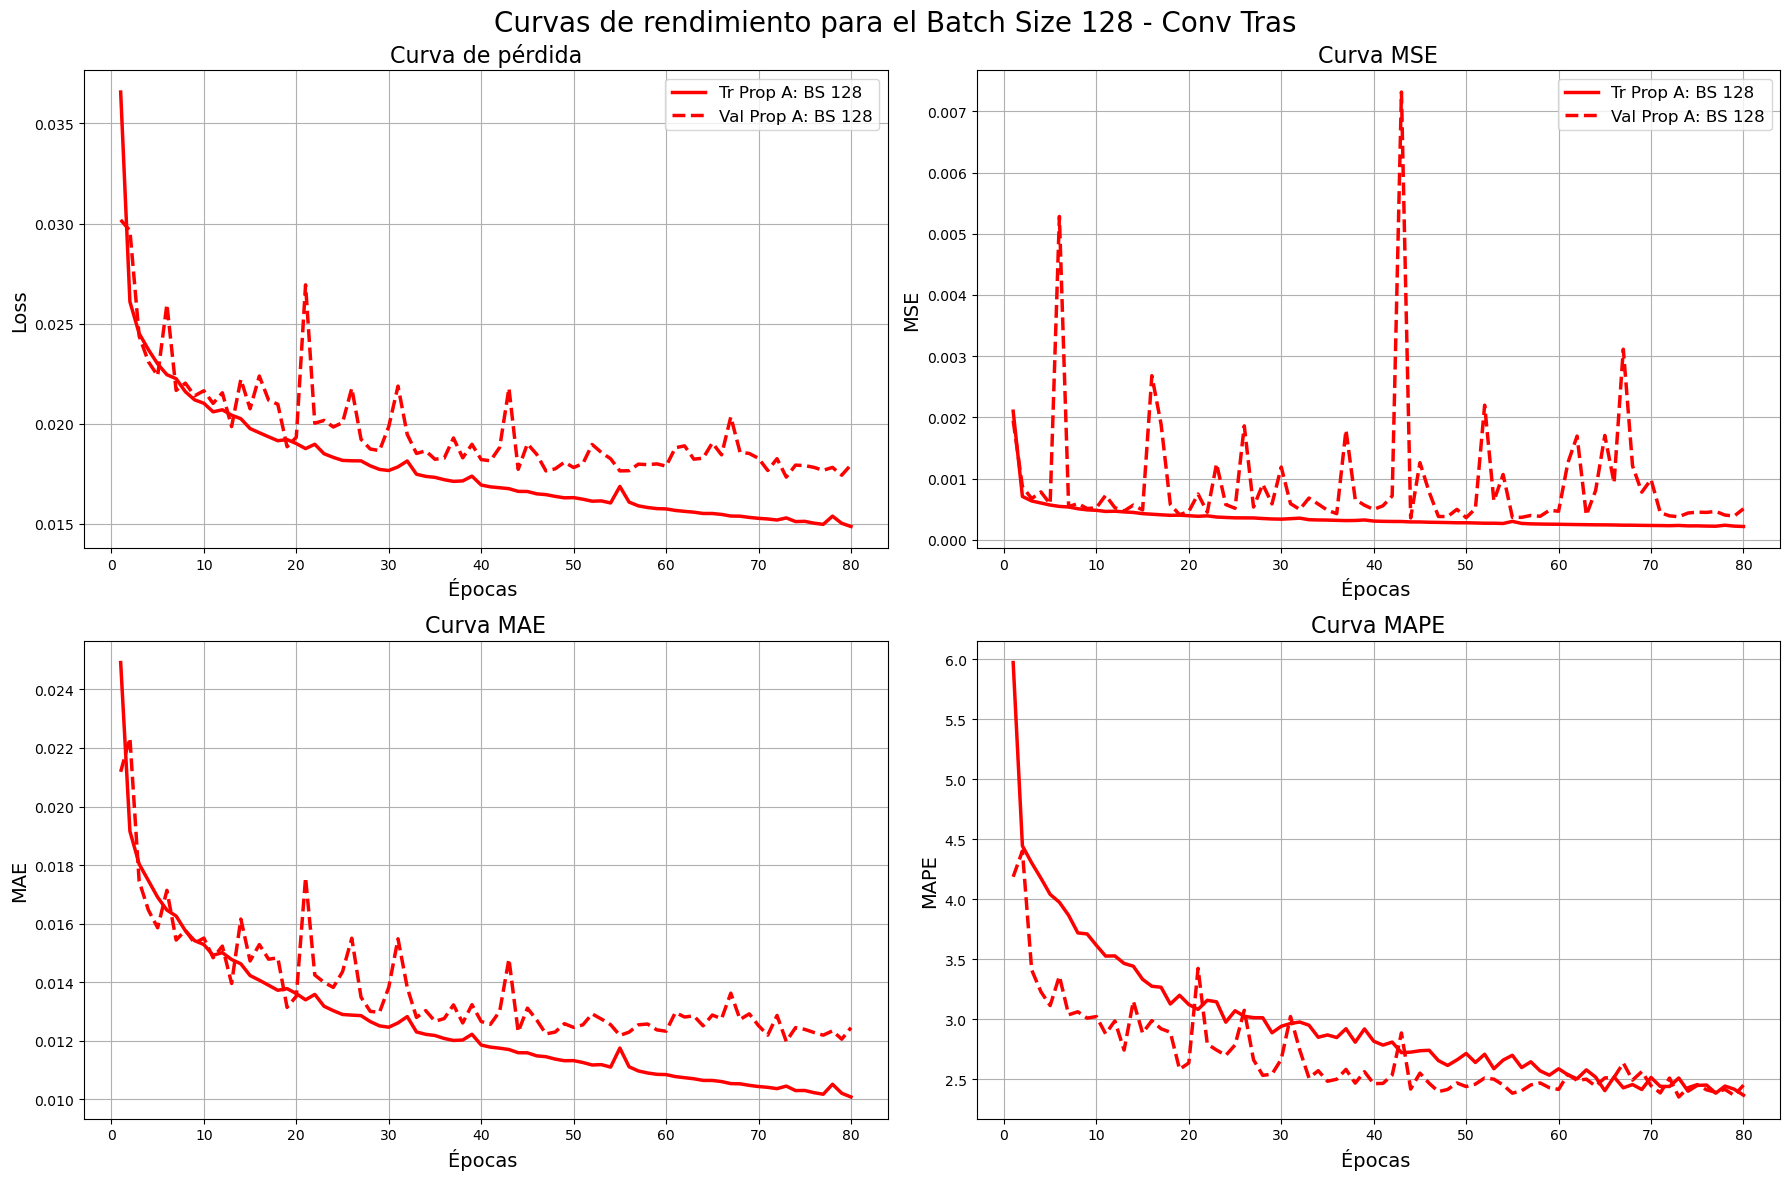

In [17]:
k = 1
plots_metricas([historiales[k]], [leyenda[2*k], leyenda[2*k+1]], title="Curvas de rendimiento para el Batch Size 128 - Conv Tras", colores=[colores[k]])

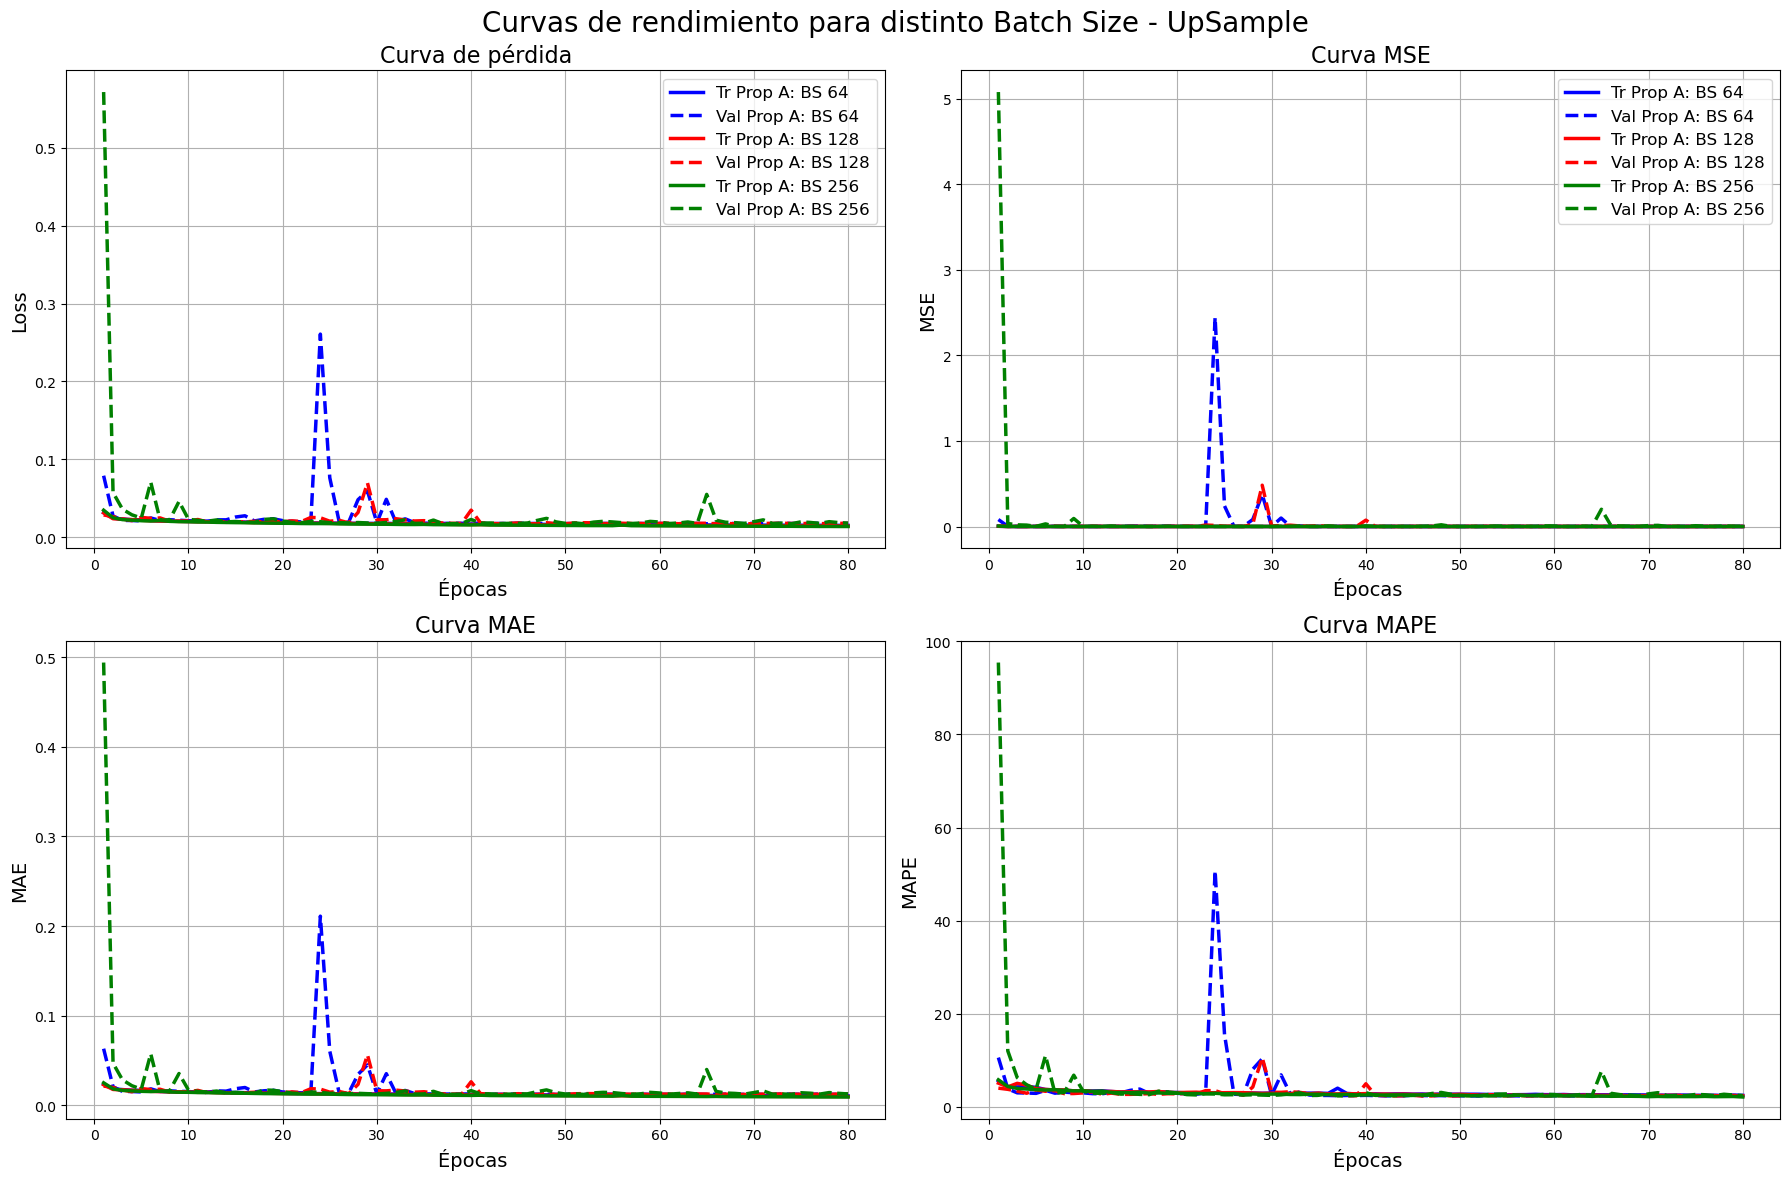

In [10]:
with open('historiales/historial_UNET_190824_16_80_640.75_prop_A.pkl', 'rb') as file:
    history_1 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_1280.75_prop_A.pkl', 'rb') as file:
    history_2 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_2560.75_prop_A.pkl', 'rb') as file:
    history_3 = pickle.load(file)

historiales=[history_1, history_2, history_3]

plots_metricas(historiales, leyenda, title= "Curvas de rendimiento para distinto Batch Size - UpSample")

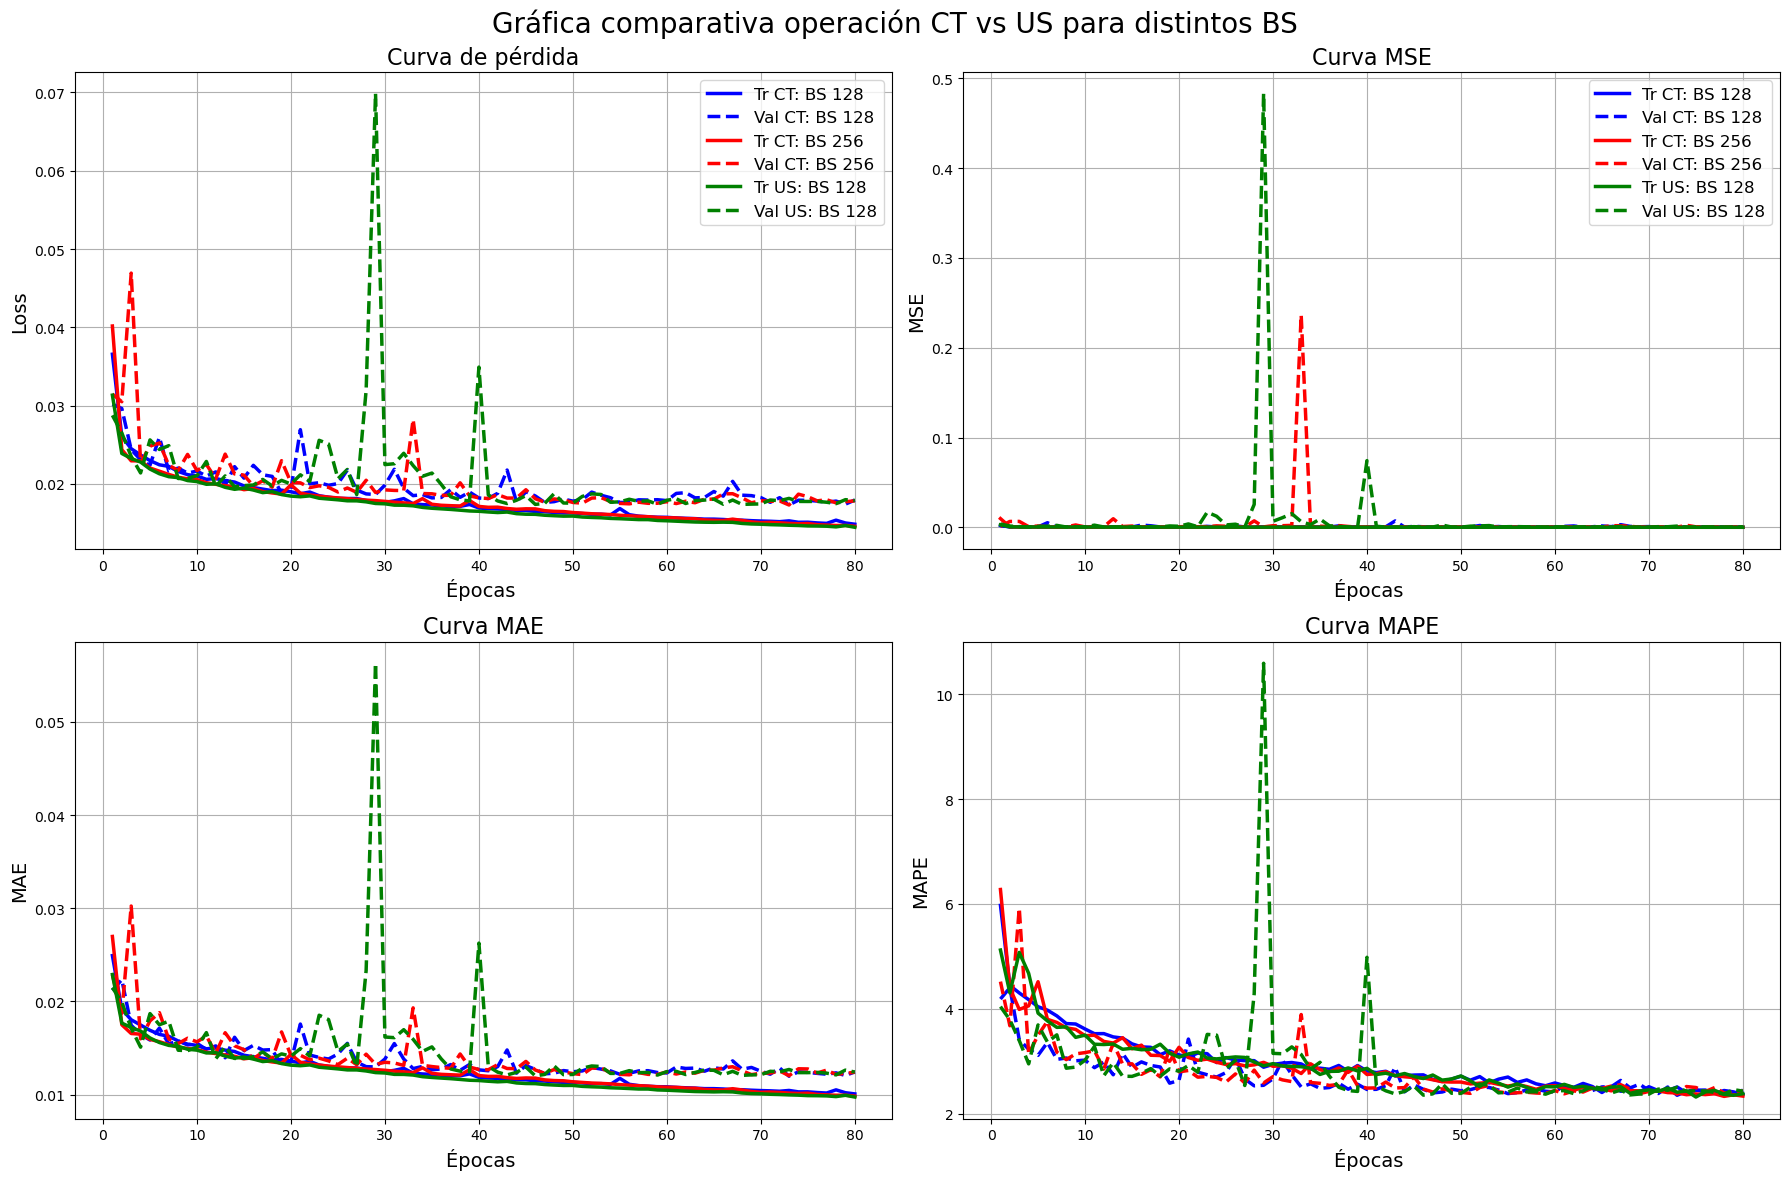

In [4]:
with open('historiales/historial_UNET_190824_16_80_1280.75_prop_A_full.pkl', 'rb') as file:
    history_a = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_2560.75_prop_A_full.pkl', 'rb') as file:
    history_b = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_1280.75_prop_A.pkl', 'rb') as file:
    history_c = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_2560.75_prop_A.pkl', 'rb') as file:
    history_d = pickle.load(file)

historiales= [history_a,history_b,history_c]

leyenda= ['Tr CT: BS 128', 'Val CT: BS 128', 
          'Tr CT: BS 256', 'Val CT: BS 256',
          'Tr US: BS 128', 'Val US: BS 128',
          'Tr US: BS 256', 'Val US: BS 256']
    
plots_metricas(historiales, leyenda, title="Gráfica comparativa operación CT vs US para distintos BS")

##### Cosas por revisar:

- No hemos explorado las variables topográficas estáticas de alta resolución aún. 
- Seguir entrenando redes... 
- Emitir salidas para ver cómo se comportan en zonas de interés y revisar error vs altura
- Revisar combinación de variables. 
- Energía cinética: agregar a la función de pérdida (dif. de los gradiantes al cuadrado) y la conservación (gradiante del pixel grande - la sumatoria del gradiante del pixel chico)
- Estamos trabajando con una función de pérdida fija: $|Y - \hat{Y} | + \lambda  | \nabla Y - \nabla \hat{Y} | $ con $\lambda = 0.75$, quizás cambiar $\lambda$
- Diferencia de las curvas del Weibull

El punto anterior invita al siguiente punto:
- Probar distintos hiperparámetros de la red: no hemos jugado con los hiperparámetros básicos como BS, LR, cambiar el UpScaling por ConvTras, DropOut, y más funciones de pérdida. 


- Mostrar redes, variables y todo eso
- Hablar un poco de caracterización de los casos


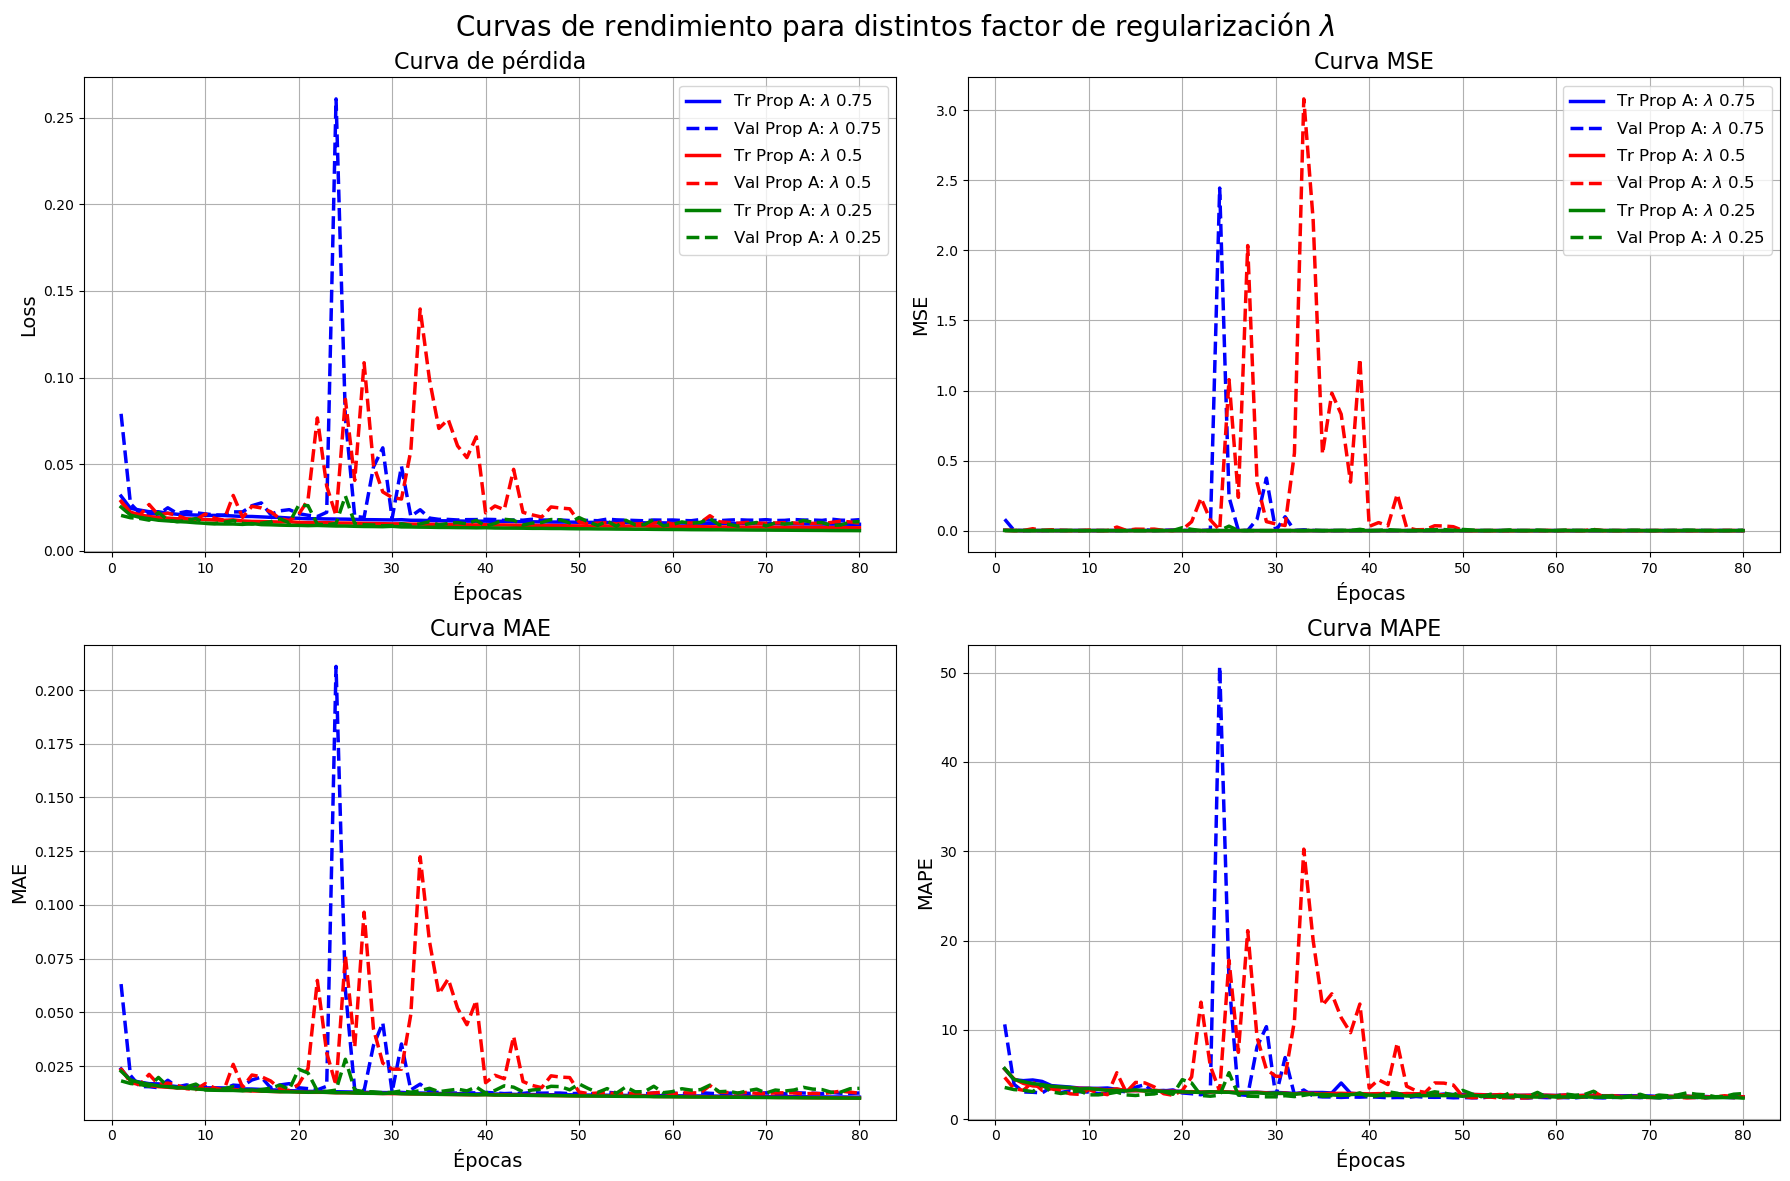

In [5]:
with open('historiales/historial_UNET_190824_16_80_640.75_prop_A.pkl', 'rb') as file:
    history_1 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_640.5_prop_A.pkl', 'rb') as file:
    history_2 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_640.25_prop_A.pkl', 'rb') as file:
    history_3 = pickle.load(file)

historiales=[history_1, history_2, history_3]
leyenda= ['Tr Prop A: $\lambda$ 0.75', 'Val Prop A: $\lambda$ 0.75',
          'Tr Prop A: $\lambda$ 0.5', 'Val Prop A: $\lambda$ 0.5', 
          'Tr Prop A: $\lambda$ 0.25', 'Val Prop A: $\lambda$ 0.25']

plots_metricas(historiales, leyenda, title="Curvas de rendimiento para distintos factor de regularización $\lambda$")

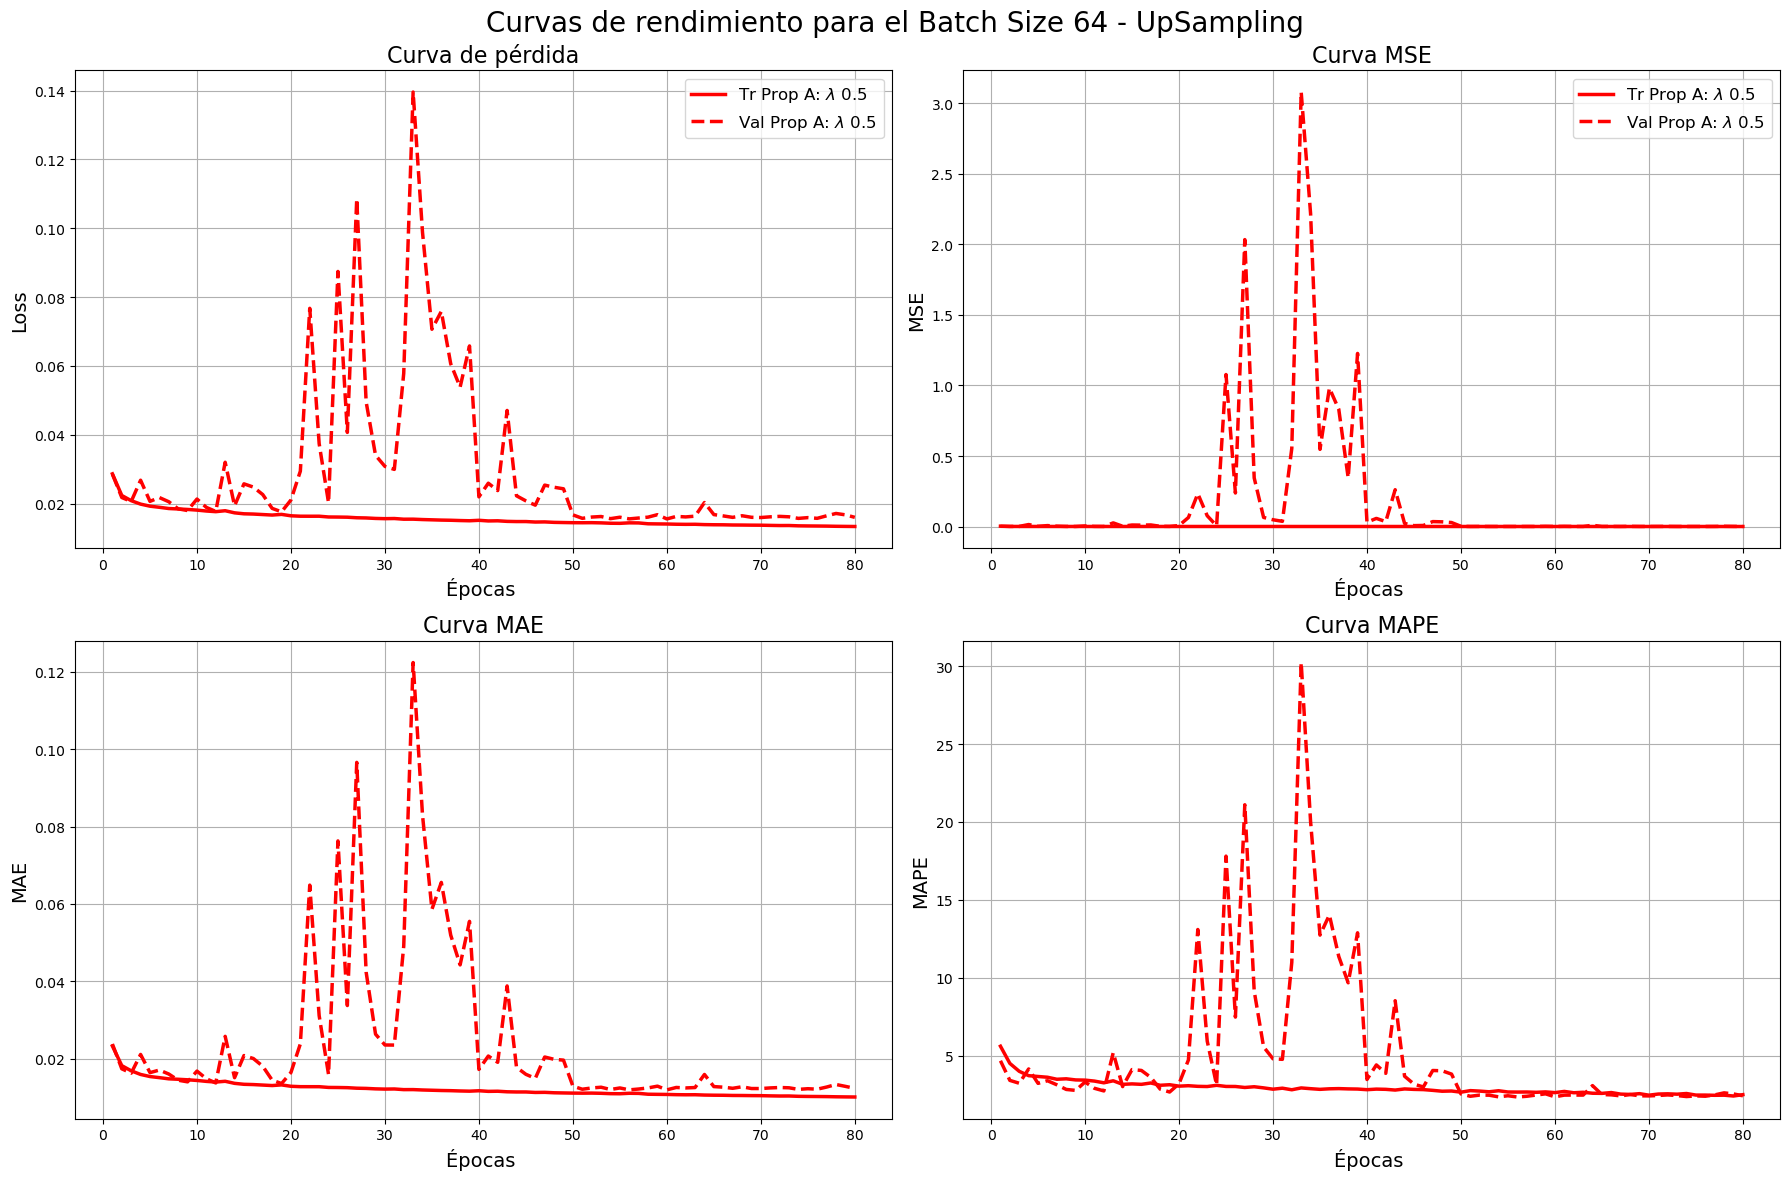

In [8]:
k=1
plots_metricas([historiales[k]], [leyenda[2*k], leyenda[2*k+1]],
                title="Curvas de rendimiento para el Batch Size 64 - UpSampling", 
                colores=[colores[k]])